In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [59]:
#source US Trade/Census US Exports
# 1.    Soybeans: $15 billion
# 2.    Civilian aircraft: $8.4 billion
# 3.    Cotton: $3.4 billion
# 4.    Copper materials: $3 billion
# 5.    Passenger vehicles (small engines): $3 billion
# 6.    Aluminum materials: $2.4 billion
# 7.    Passenger vehicles (large engines): $2.2 billion
# 8.    Electronic integrated circuits: $1.7 billion
# 9.    Corn: $1.3 billion
# 10.  Coal: $1.2 billion

In [60]:
exports = pd.read_excel('Downloads/exstall.xls', skiprows=4)

In [61]:
exports.Month = exports.Month.to_datetime()


,statename,rank,hs6,abbreviatn,val2015,val2016,val2017,val2018,share15,share16,share17,share18,change
0,Alabama,0,0,World,19322.19,20471.18,21786.30,21349.24,1.2853,1.4108,1.4090,1.2829,-2.01
1,Alabama,0,25,Top 25,11661.97,13280.16,14613.30,14513.64,60.3553,64.8725,67.0756,67.9820,-0.68
2,Alabama,1,870323,PASS VEH SPK-IG INT COM R,3142.50,3539.32,3453.42,2751.68,16.2637,17.2893,15.8513,12.8889,-20.32
3,Alabama,2,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",605.61,862.71,1141.84,2066.34,3.1343,4.2143,5.2411,9.6788,80.97
4,Alabama,3,870324,PASS VEH SPK-IG INT COM RCPR P ENG > 3000 CC,1669.70,1820.76,2177.04,1937.12,8.6414,8.8942,9.9927,9.0735,-11.02


In [62]:
Export_billions = exports.val2018.sum()//1000
Export_billions

3351.0

In [63]:
exports = exports[exports['rank'] != 0]

In [64]:
exports.head()

,statename,rank,hs6,abbreviatn,val2015,val2016,val2017,val2018,share15,share16,share17,share18,change
2,Alabama,1,870323,PASS VEH SPK-IG INT COM R,3142.50,3539.32,3453.42,2751.68,16.2637,17.2893,15.8513,12.8889,-20.32
3,Alabama,2,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",605.61,862.71,1141.84,2066.34,3.1343,4.2143,5.2411,9.6788,80.97
4,Alabama,3,870324,PASS VEH SPK-IG INT COM RCPR P ENG > 3000 CC,1669.70,1820.76,2177.04,1937.12,8.6414,8.8942,9.9927,9.0735,-11.02
5,Alabama,4,270112,"BITUMINOUS COAL, NOT AGGLOMERATED",694.61,560.87,1404.36,1645.55,3.5949,2.7398,6.4461,7.7078,17.17
6,Alabama,5,870333,PASS VEH COM-IG INT COM ENG > 2500 CC,1760.87,2046.18,1692.03,1419.13,9.1132,9.9954,7.7665,6.6472,-16.13


In [65]:
number_ones = exports[exports['rank'] == 1]
number_ones = number_ones.sort_values(by='share18', ascending = True)
number_ones = number_ones.sort_values(by='val2018', ascending=True)
number_ones.set_index('statename')

,rank,hs6,abbreviatn,val2015,val2016,val2017,val2018,share15,share16,share17,share18,change
statename,,,,,,,,,,,,
South Dakota,1,230330,"BREWING OR DISTILLING DREGS AND WASTE, W/NT PE...",95.84,87.90,90.82,103.74,6.7470,7.2162,6.6796,7.2180,14.22
Hawaii,1,271019,PETROL OIL BITUM MINERA,165.14,66.85,190.66,183.16,8.7083,8.4044,20.0184,28.3115,-3.93
Rhode Island,1,720449,FERROUS WASTE & SCRAP NESOI,139.29,117.86,186.19,244.24,6.5309,5.1734,7.7849,10.1775,31.17
Montana,1,240220,CIGARETTES CONTAINING TOBACCO,119.39,185.26,217.55,281.29,8.5031,13.6219,13.4622,17.0114,29.30
Virgin Islands,1,271019,PETROL OIL BITUM MINERA,80.90,170.46,631.51,361.83,54.1852,57.4975,65.7178,51.2727,-42.70
District of Columbia,1,930690,BOMB MINES OT AMMNTION,66.00,320.79,336.41,379.02,6.0661,24.1074,22.6832,13.9022,12.67
Maine,1,30632,"LOBSTERS, LIVE, FRESH,OR CHILLED",0.00,0.00,325.44,386.08,0.0000,0.0000,12.0001,13.6648,18.63
Colorado,1,20130,"MEAT OF BOVINE ANIMALS, BONELESS, FRESH OR CHI...",345.78,387.67,507.20,475.69,4.3496,5.1139,6.2974,5.7193,-6.21
Idaho,1,854232,"MEMORIES, ELECTRONIC INTEGRATED CIRCUITS",798.25,800.47,593.34,570.01,18.5549,16.4135,15.3551,14.1739,-3.93


In [66]:
Aircraft = exports[exports['abbreviatn'] == 'CIVILIAN AIRCRAFT, ENGINES, AND PARTS'].sort_values(by='val2018',ascending=True)
Aircraft.drop(['abbreviatn','hs6',], axis=1)
Aircraft

,statename,rank,hs6,abbreviatn,val2015,val2016,val2017,val2018,share15,share16,share17,share18,change
1289,Virgin Islands,19,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",0.07,0.01,6.19,0.28,0.0470,0.0048,0.6445,0.0390,-95.56
234,District of Columbia,17,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",31.57,11.58,12.94,9.41,2.9014,0.8699,0.8728,0.3453,-27.27
48,Alaska,20,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",46.81,28.28,60.16,25.36,1.0131,0.6500,1.2171,0.5314,-57.84
715,Montana,12,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",19.56,96.37,27.18,34.27,1.3929,7.0859,1.6820,2.0727,26.09
345,Idaho,20,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",32.95,74.32,28.83,40.00,0.7660,1.5240,0.7462,0.9945,38.70
301,Hawaii,3,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",14.99,30.99,67.86,47.50,0.7903,3.8961,7.1245,7.3417,-30.00
1302,Vermont,5,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",40.65,58.17,47.94,57.36,1.2797,1.9435,1.7270,1.9647,19.65
200,Delaware,10,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",139.66,147.16,71.19,63.32,2.5826,3.2576,1.5594,1.3463,-11.06
693,Mississippi,17,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",96.21,178.13,122.28,90.60,0.8869,1.6957,1.1121,0.7673,-25.90
870,New Mexico,5,880000,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",59.56,84.26,95.85,102.87,1.5749,2.3302,2.6553,2.8147,7.33


In [67]:
len(Aircraft)

46

In [68]:
#Billions of USD in Civilian Aircraft
Aircraft.val2018.sum()//1000

129.0

In [69]:
exports['abbreviatn'].value_counts()

CIVILIAN AIRCRAFT, ENGINES, AND PARTS                 46
MACH FOR RECP/CONVR/TRANS/R                           25
PARTS AND ACCESSORIES OF MOTOR VEHICLES, NESOI        17
INSTR & APPL F MEDICAL SURGICAL DENTAL VET, NESOI     17
PETROL OIL BITUM MINERA                               17
TAPS COCKS ETC F PIPE VAT INC THERMO CONTROL NESO     16
MEDICAMENTS NESOI, MEASURED DOSES, RETAIL PK NESOI    16
PROCESSORS AND CONTROLLERS, ELECTRONIC INTEG CIRCT    16
PASS VEH SPK-IG INT COM R                             15
SOYBEANS, NESOI                                       14
PASS VEH SPK-IG INT COM RCPR P ENG > 3000 CC          14
ELECTRONIC INTEGRATED CIRCUITS, NESOI                 13
COMPOSITE DIAGNOSTIC/LAB REAGENTS, EXC PHARMACEUT     13
ARTICLES OF PLASTICS, NESOI                           12
PHONES FOR CELLULAR NTWKS OR FOR OTH WIRELESS NTWK    11
PTS & ACCESS OF BODIES OF MOTOR VEHICLES, NESOI       11
CONTROLS ETC W ELECT APPR                             11
LT OILS, PREPS GT=70% PETRO    

<Figure size 7200x4800 with 0 Axes>

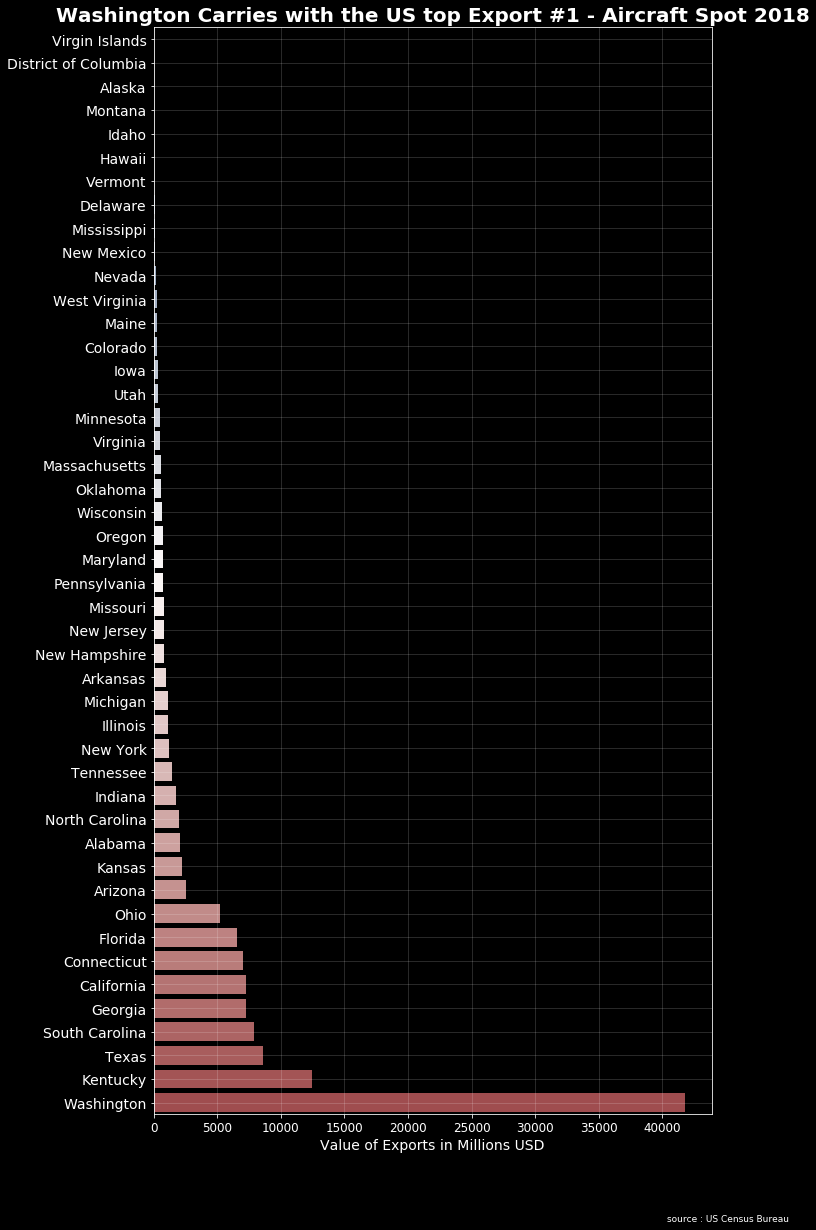

In [70]:
plt.style.use('dark_background')
plt.figure(dpi=1200)
ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(
    x=Aircraft['val2018'],y =Aircraft['statename'],
    palette='vlag').set_title('Washington Carries with the US top Export #1 - Aircraft Spot 2018', fontsize=20,fontweight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("")
plt.xlabel("Value of Exports in Millions USD", fontsize=14)
plt.grid(True, alpha=0.2)
plt.text(50000,50, s='source : US Census Bureau', fontsize=9, ha='right')
#labels for bar graph tips
labels = [ i for i in number_ones['abbreviatn']]



In [71]:
ten_air = Aircraft.sort_values(by='val2018', ascending=False)
ten_air = ten_air.head(10)

In [72]:
from matplotlib import cm

In [73]:
Iowa = pd.DataFrame(exports[exports['statename'] == 'Iowa'])

In [74]:
Iowa = Iowa.drop(['statename','share15','share16','share17','share18','rank','hs6'],axis=1)

In [75]:
Iowa.sort_values(by='val2018', ascending=False)

,abbreviatn,val2015,val2016,val2017,val2018,change
407,"CORN (MAIZE), OTHER THAN SEED CORN",966.23,1176.12,1184.05,1443.14,21.88
408,"TRACTORS, EXCEEDING 130 KW",0.00,0.00,746.75,812.55,8.81
409,"SOYBEANS, NESOI",385.00,254.42,181.21,432.13,138.47
410,"MEAT OF SWINE, NESOI, FROZEN",375.42,321.25,357.21,400.71,12.18
411,"HERBCD, ANTISPROUT. PROD. & PLANT-GRWTH REG. NES",404.87,364.71,394.27,396.78,0.64
412,"MEAT OF SWINE, NESOI, FRESH OR CHILLED",452.98,457.31,441.70,388.30,-12.09
413,"BREWING OR DISTILLING DREGS AND WASTE, W/NT PE...",536.00,325.72,348.77,384.07,10.12
414,"SOYBEAN OILCAKE & OTH SOLID RESIDUE,",324.39,342.47,256.24,346.64,35.28
415,"CIVILIAN AIRCRAFT, ENGINES, AND PARTS",263.56,262.00,282.17,302.60,7.24
416,"MECH FRONT-END SHOVEL LOADERS, SELF-PROPELLED",179.30,115.84,168.00,221.38,31.77


In [76]:
longex = exports.groupby('statename')

In [77]:
histex = pd.DataFrame(longex['val2018','val2017','val2016','val2015'].sum())

In [78]:
histex = histex.sort_values(by='val2018', ascending=False)
histex

,val2018,val2017,val2016,val2015
statename,,,,
Texas,172974.60,131162.21,102177.03,105461.97
California,63578.87,60132.58,51548.58,50865.36
Washington,59693.31,58059.83,62300.32,66816.82
Louisiana,54947.43,45844.62,36781.97,35355.62
New York,45737.83,40780.80,39979.05,43330.81
Michigan,30138.88,31987.59,28520.26,27267.88
Florida,23086.14,22159.37,20499.17,19757.09
South Carolina,22194.52,20185.99,19364.24,18113.30
Illinois,22070.03,22020.66,19061.55,19819.30


In [79]:
hit = histex.T
hit

statename,Texas,California,Washington,Louisiana,New York,Michigan,Florida,South Carolina,Illinois,Indiana,Kentucky,Ohio,Georgia,Puerto Rico,Alabama,Oregon,Tennessee,Pennsylvania,New Jersey,Massachusetts,North Carolina,Arizona,Utah,Connecticut,Nevada,Mississippi,Virginia,Iowa,Minnesota,Kansas,West Virginia,Missouri,North Dakota,Maryland,Wisconsin,Unidentified,Nebraska,Alaska,Arkansas,Colorado,Delaware,New Hampshire,Oklahoma,New Mexico,Idaho,District of Columbia,Vermont,Maine,Rhode Island,Wyoming,Montana,South Dakota,Virgin Islands,Hawaii
val2018,172974.60,63578.87,59693.31,54947.43,45737.83,30138.88,23086.14,22194.52,22070.03,21411.87,20628.92,20449.36,19424.57,16026.48,14513.63,14505.35,14460.61,13489.23,13301.09,12300.10,12138.44,10637.43,10463.18,9888.99,8814.34,8025.27,7702.81,7555.77,7550.15,6781.38,6654.29,6267.55,5865.98,5660.38,5620.13,5267.53,5209.67,4527.51,3682.88,3448.83,3256.33,3003.19,2842.80,2664.19,2529.20,2507.01,2263.38,1853.11,1408.15,1248.00,1233.60,867.75,703.26,552.20
val2017,131162.21,60132.58,58059.83,45844.62,40780.80,31987.59,22159.37,20185.99,22020.66,20250.23,20055.60,18020.11,16543.26,13733.25,14613.29,14150.19,14985.38,11291.76,12899.68,12230.54,12047.86,9652.56,7839.55,7838.73,9979.86,7022.82,6335.78,6574.67,6444.25,6801.76,5489.00,6510.83,4882.54,3263.14,5154.72,5030.21,4507.39,4669.45,3468.07,3202.76,2963.17,2564.49,2234.69,2590.55,2279.99,1238.01,2052.14,1727.38,1225.35,1091.01,1148.25,788.00,952.35,514.88
val2016,102177.03,51548.58,62300.32,36781.97,39979.05,28520.26,20499.17,19364.24,19061.55,17283.33,17273.61,17609.37,15870.82,12579.69,13280.16,13136.12,13710.16,8663.95,10625.28,9472.16,8710.79,10047.21,8326.65,7577.24,7401.08,6805.94,5589.80,5450.43,5579.54,5799.05,3217.22,6191.48,4184.27,3094.02,4575.53,4749.92,3822.94,3910.29,3096.11,2959.71,3115.51,1667.54,1792.58,2599.51,2850.51,1015.45,2175.00,1449.69,1091.46,972.21,947.35,669.11,290.44,328.68
val2015,105461.97,50865.36,66816.82,35355.62,43330.81,27267.88,19757.09,18113.30,19819.30,16403.90,14938.60,17826.48,16644.58,13541.89,11661.99,11924.49,13883.87,9800.40,10624.83,9155.96,7943.86,11272.28,9347.81,8173.17,6525.27,7088.24,6166.99,5939.01,5851.07,5660.85,3399.32,5280.43,2827.55,3764.81,4721.67,4719.69,3720.32,3927.24,3008.11,2866.80,3938.60,1485.26,1864.76,2660.66,2374.95,707.28,2309.82,1354.51,918.41,1027.52,891.88,742.82,134.40,458.49


In [92]:
plt.figure(figsize=(10,20), dpi=1200)
sns.heatmap(histex, robust=True, square=True, 
            vmin=10000, vmax=90000, 
            center=0, linecolor='cyan',linewidths=.008)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.text(13,55, s='source : US Census Bureau', fontsize=9, ha='right')
plt.ylabel("")
plt.xlabel("Lack of Export Power U.S. 2015-2018 : Millions", fontsize=22);